<a href="https://colab.research.google.com/github/kazars24/kursovaya-rabota-2021/blob/main/ML_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python --upgrade

In [18]:
import cv2 as cv
from google.colab.patches import cv2_imshow 

In [10]:
net = cv.dnn_DetectionModel('/content/drive/MyDrive/yolov4/yolov4.cfg', '/content/drive/MyDrive/yolov4/yolov4.weights')
net.setInputSize(704, 704)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

<dnn_Model 0x7f950972d930>

In [11]:
frame = cv.imread('/content/for_test.jpeg')

In [12]:
with open('/content/drive/MyDrive/yolov4/coco.names', 'rt') as f:
  names = f.read().rstrip('\n').split('\n')

In [13]:
classes, confidences, boxes = net.detect(frame, confThreshold=0.1, nmsThreshold=0.4)

In [14]:
for classId, confidence, box in zip(classes.flatten(), confidences.flatten(), boxes):
  label = '%.2f' % confidence
  label = '%s: %s' % (names[classId], label)
  labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
  left, top, width, height = box
  top = max(top, labelSize[1])
  cv.rectangle(frame, box, color=(0, 255, 0), thickness=2)
  cv.rectangle(frame, (left, top - labelSize[1]), (left + labelSize[0], top + baseLine), (255, 255, 255), cv.FILLED)
  cv.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
  

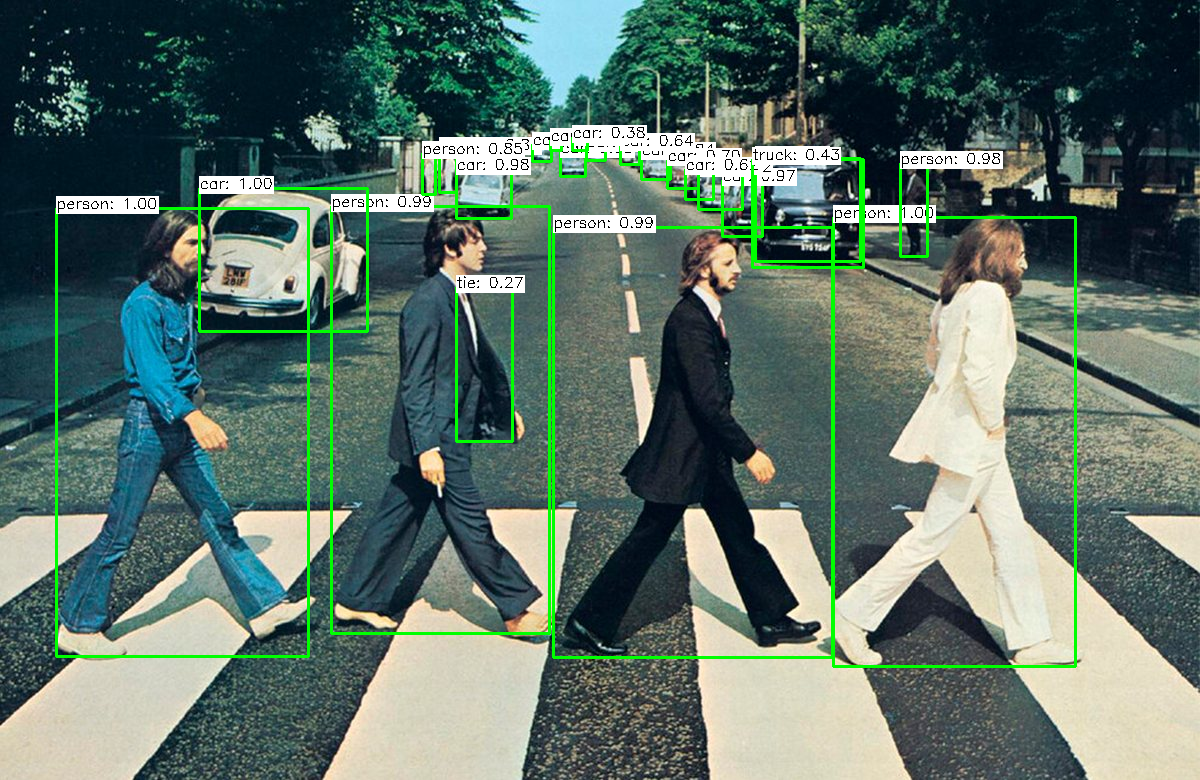

In [15]:
cv2_imshow(frame)

In [16]:
boxes

array([[ 56, 208, 253, 449],
       [833, 217, 243, 450],
       [553, 227, 280, 431],
       [331, 206, 219, 428],
       [900, 163,  28,  94],
       [439, 149,  18,  44],
       [422, 153,  14,  42],
       [199, 188, 169, 144],
       [456, 169,  56,  50],
       [722, 180,  41,  57],
       [698, 171,  45,  39],
       [532, 144,  20,  18],
       [560, 152,  26,  25],
       [586, 146,  20,  15],
       [641, 154,  30,  26],
       [667, 160,  32,  29],
       [620, 145,  20,  20],
       [755, 158, 106, 104],
       [685, 169,  29,  31],
       [550, 140,  12,  11],
       [572, 137,  16,  14],
       [752, 159, 112, 109],
       [456, 287,  57, 155]], dtype=int32)

In [24]:
with open('output.txt',"w") as f:
    f.write("\n".join(" ".join(map(str, x)) for x in boxes))